In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy.crs as ccrs
import numpy as np

In [36]:
filepath='/Users/katlingarula/Desktop/Current_CU_Stuff/DLA/IndividualFlightData/EXS43DY.csv'
flight_df=pd.read_csv(filepath, header='infer')
print(flight_df.head())

   Unnamed: 0        time   icao24        lat       lon    velocity  \
0           1  1656338400  40700.0  54.951965 -4.733653  229.571752   
1        2008  1656338410  40700.0  54.935532 -4.761362  230.299175   
2       10761  1656338420  40700.0  54.921295 -4.785354  230.656864   
3       21974  1656338430  40700.0  54.906083 -4.810847  231.384307   
4       29069  1656338440  40700.0  54.891174 -4.835923  231.754024   

      heading  vertrate  callsign  onground  alert    spi  squawk  \
0  224.001284   7.15264  EXS43DY      False  False  False  2163.0   
1  224.004439   7.15264  EXS43DY      False  False  False  2163.0   
2  224.096356   5.85216  EXS43DY      False  False  False  2163.0   
3  224.099197   6.50240  EXS43DY      False  False  False  2163.0   
4  224.010689   5.85216  EXS43DY      False  False  False  2163.0   

   baroaltitude  geoaltitude  lastposupdate   lastcontact  
0       8542.02      8602.98   1.656338e+09  1.656338e+09  
1       8610.60      8686.80   1.65633

Text(0.5, 1.0, 'Plane Latitude Longitude Graph')

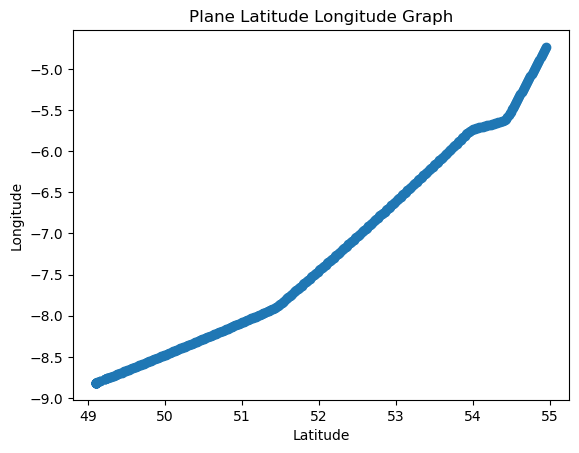

In [37]:
plt.scatter(flight_df['lat'], flight_df['lon'])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Plane Latitude Longitude Graph")

Text(0, 0.5, 'Latitude')

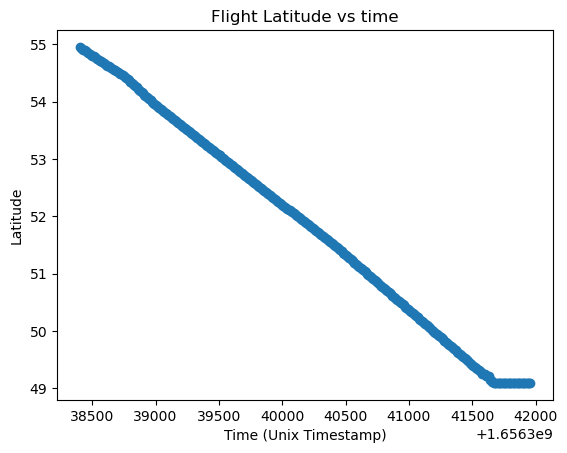

In [38]:
plt.scatter(flight_df['time'],flight_df['lat'])
plt.title("Flight Latitude vs time")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("Latitude")

Text(0, 0.5, 'Longitude')

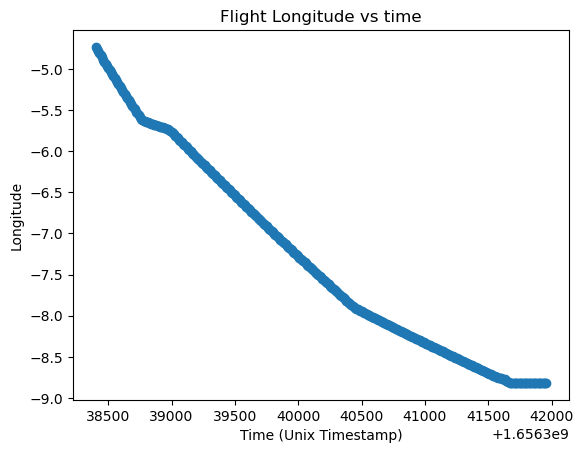

In [39]:
plt.scatter(flight_df['time'],flight_df['lon'])
plt.title("Flight Longitude vs time")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("Longitude")

Text(0, 0.5, 'Altitude (m)')

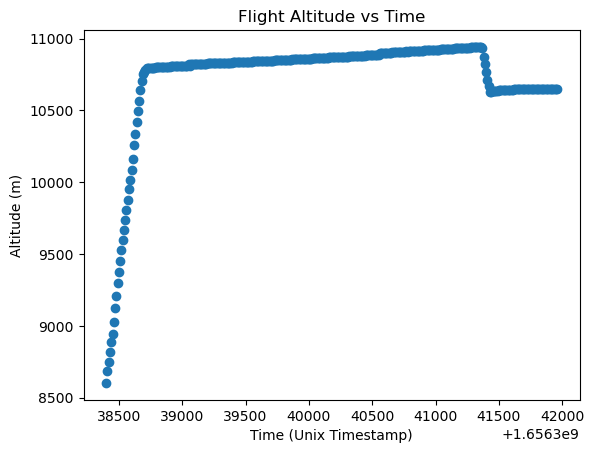

In [40]:
plt.scatter(flight_df['time'], flight_df['geoaltitude']) #label Axies, Title where it's taking off from (Google Callsign)
plt.title("Flight Altitude vs Time")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("Altitude (m)")

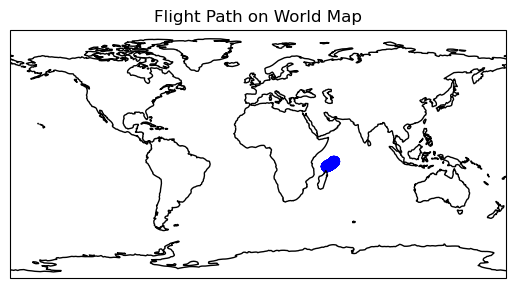

In [41]:
ax = plt.axes(projection=ccrs.PlateCarree()) #Plot Map of the world
ax.coastlines() #Draw out coastlines
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree()) #Determine bounds (in this case displays entire world)
ax.scatter(flight_df['lat'], flight_df['lon'], color='blue', linewidth=2, marker='o') #Plot Latitude and Longitude of dataset

plt.title("Flight Path on World Map")
plt.show()

In [42]:
#Define single transmiter and reciever latlon geoaltitude coordinates
tx_latlonalt=[51,-5.5,0]
rx_latlonalt=[52,-10,0]

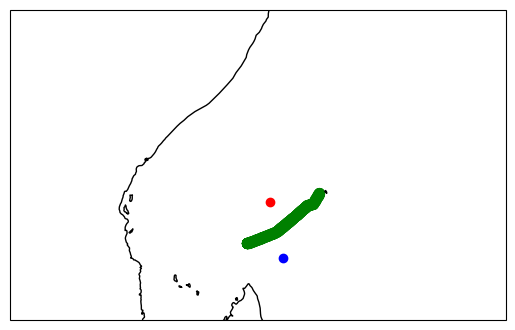

In [43]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.set_extent([30, 70, -15, 10], crs=ccrs.PlateCarree())

ax.scatter(flight_df['lat'], flight_df['lon'], color='green', linewidth=2, marker='o')
ax.scatter(tx_latlonalt[0],tx_latlonalt[1],color='red') 
ax.scatter(rx_latlonalt[0],rx_latlonalt[1],color='blue')

plt.show()

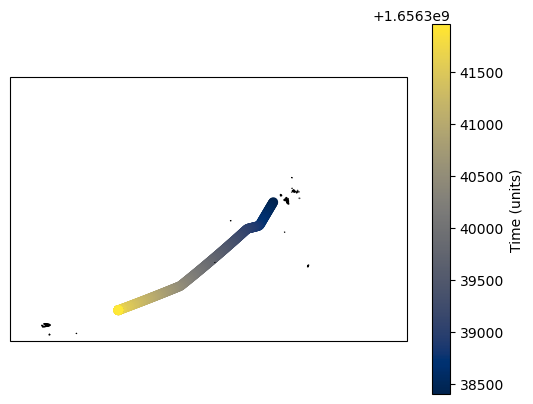

In [44]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.set_extent([45, 60, -10, 0], crs=ccrs.PlateCarree())

ax.scatter(flight_df['lat'], flight_df['lon'], c=flight_df['time'], cmap='cividis') #I don't know why I need this line and the one bellow but I do

scatter = ax.scatter(flight_df['lon'], flight_df['lat'], c=flight_df['time'], cmap='cividis')

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Time (units)')  # Set the label for the colorbar


plt.show()

In [45]:
import skytools
import jmtools as jt
from jmtools import geodetic2aer
from jmtools import interferometry

In [46]:
earth_measurements=[6378,6356] #TODO: Verify these as accurate values for a,b

In [47]:
#Convert Transmiter to ECEF coordinates
tx_xyz=list(range(3))
tx_xyz[0],tx_xyz[1],tx_xyz[2]=jt.geodetic2aer.geodetic2ecef(tx_latlonalt[0],tx_latlonalt[1],
                                .001*tx_latlonalt[2],earth_measurements[0],earth_measurements[1]) #Define x y z coordinates of transmiter
print(tx_xyz)

#Convert Reciever to ECEF coordinates
rx_xyz=list(range(3))
rx_xyz[0],rx_xyz[1],rx_xyz[2]=jt.geodetic2aer.geodetic2ecef(rx_latlonalt[0],rx_latlonalt[1],
                                .001*rx_latlonalt[2],earth_measurements[0],earth_measurements[1]) #Define x y z coordinates of reciever
print(rx_xyz)

[4003.661646892614, -385.50876928427965, 4932.770701477795]
[3875.3288534793164, -683.325035986405, 5002.026815018023]


In [48]:
flight_df.head()

,Unnamed: 0,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1,1656338400,40700.0,54.951965,-4.733653,229.571752,224.001284,7.15264,EXS43DY,False,False,False,2163.0,8542.02,8602.98,1.656338e+09,1.656338e+09
1,2008,1656338410,40700.0,54.935532,-4.761362,230.299175,224.004439,7.15264,EXS43DY,False,False,False,2163.0,8610.60,8686.80,1.656338e+09,1.656338e+09
2,10761,1656338420,40700.0,54.921295,-4.785354,230.656864,224.096356,5.85216,EXS43DY,False,False,False,2163.0,8679.18,8747.76,1.656338e+09,1.656338e+09
3,21974,1656338430,40700.0,54.906083,-4.810847,231.384307,224.099197,6.50240,EXS43DY,False,False,False,2163.0,8740.14,8816.34,1.656338e+09,1.656338e+09
4,29069,1656338440,40700.0,54.891174,-4.835923,231.754024,224.010689,5.85216,EXS43DY,False,False,False,2163.0,8801.10,8884.92,1.656338e+09,1.656338e+09


In [49]:
#Include ECEF coordinates in dataframe
#TODO Make a function that saves this as a csv

#create column representing coordinites in ECEF Coordinates

flight_df['X'],flight_df['Y'],flight_df['Z']=jt.geodetic2aer.geodetic2ecef(flight_df['lat'],flight_df['lon'],.001*flight_df['geoaltitude'],earth_measurements[0],earth_measurements[1])

In [50]:
flight_df.head()

,Unnamed: 0,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,X,Y,Z
0,1,1656338400,40700.0,54.951965,-4.733653,229.571752,224.001284,7.15264,EXS43DY,False,False,False,2163.0,8542.02,8602.98,1.656338e+09,1.656338e+09,3663.533122,-303.363719,5204.575548
1,2008,1656338410,40700.0,54.935532,-4.761362,230.299175,224.004439,7.15264,EXS43DY,False,False,False,2163.0,8610.60,8686.80,1.656338e+09,1.656338e+09,3664.928350,-305.263832,5203.591964
2,10761,1656338420,40700.0,54.921295,-4.785354,230.656864,224.096356,5.85216,EXS43DY,False,False,False,2163.0,8679.18,8747.76,1.656338e+09,1.656338e+09,3666.129407,-306.909742,5202.729986
3,21974,1656338430,40700.0,54.906083,-4.810847,231.384307,224.099197,6.50240,EXS43DY,False,False,False,2163.0,8740.14,8816.34,1.656338e+09,1.656338e+09,3667.414448,-308.660570,5201.811403
4,29069,1656338440,40700.0,54.891174,-4.835923,231.754024,224.010689,5.85216,EXS43DY,False,False,False,2163.0,8801.10,8884.92,1.656338e+09,1.656338e+09,3668.673183,-310.383610,5200.911832


In [51]:
#Find Bistatic range in Km
def bistaticrange(tx,rx,x,y,z):
    tx_range=np.sqrt((tx[0]-x)**2+(tx[1]-y)**2+(tx[2]-z)**2)
    rx_range=np.sqrt((rx[0]-x)**2+(rx[1]-y)**2+(rx[2]-z)**2)
    bistatic_range=tx_range+rx_range
    return bistatic_range

In [52]:
brange=bistaticrange(tx_xyz,rx_xyz,3663,-303,5204)
print(brange) 

923.3257666488405


In [53]:
flight_df['brange']=bistaticrange(tx_xyz,rx_xyz,flight_df['X'],flight_df['Y'],flight_df['Z'])
flight_df.head()

,Unnamed: 0,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,...,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,X,Y,Z,brange
0,1,1656338400,40700.0,54.951965,-4.733653,229.571752,224.001284,7.15264,EXS43DY,False,...,False,2163.0,8542.02,8602.98,1.656338e+09,1.656338e+09,3663.533122,-303.363719,5204.575548,922.920256
1,2008,1656338410,40700.0,54.935532,-4.761362,230.299175,224.004439,7.15264,EXS43DY,False,...,False,2163.0,8610.60,8686.80,1.656338e+09,1.656338e+09,3664.928350,-305.263832,5203.591964,918.360786
2,10761,1656338420,40700.0,54.921295,-4.785354,230.656864,224.096356,5.85216,EXS43DY,False,...,False,2163.0,8679.18,8747.76,1.656338e+09,1.656338e+09,3666.129407,-306.909742,5202.729986,914.414656
3,21974,1656338430,40700.0,54.906083,-4.810847,231.384307,224.099197,6.50240,EXS43DY,False,...,False,2163.0,8740.14,8816.34,1.656338e+09,1.656338e+09,3667.414448,-308.660570,5201.811403,910.211053
4,29069,1656338440,40700.0,54.891174,-4.835923,231.754024,224.010689,5.85216,EXS43DY,False,...,False,2163.0,8801.10,8884.92,1.656338e+09,1.656338e+09,3668.673183,-310.383610,5200.911832,906.090766


Text(0, 0.5, 'bistatic range (km)')

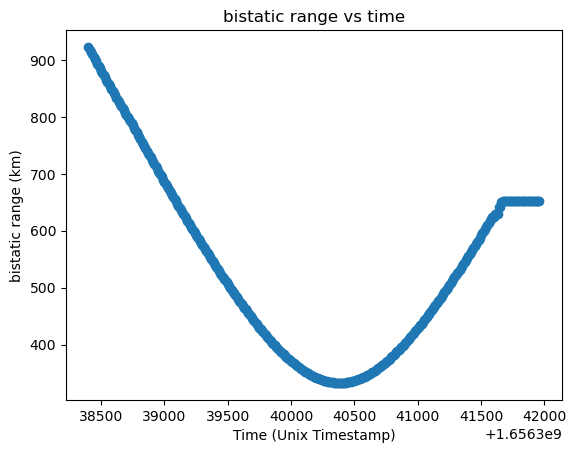

In [54]:
plt.scatter(flight_df['time'], flight_df['brange'])
plt.title("bistatic range vs time")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("bistatic range (km)")

In [55]:
wavelegnth= .003 #Wavelegnth in km (Currently 10 ft)
#TODO: Determine correct wavelegnth value
flight_df['cycles']=flight_df['brange']/wavelegnth
flight_df.head()

,Unnamed: 0,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,...,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,X,Y,Z,brange,cycles
0,1,1656338400,40700.0,54.951965,-4.733653,229.571752,224.001284,7.15264,EXS43DY,False,...,2163.0,8542.02,8602.98,1.656338e+09,1.656338e+09,3663.533122,-303.363719,5204.575548,922.920256,307640.085250
1,2008,1656338410,40700.0,54.935532,-4.761362,230.299175,224.004439,7.15264,EXS43DY,False,...,2163.0,8610.60,8686.80,1.656338e+09,1.656338e+09,3664.928350,-305.263832,5203.591964,918.360786,306120.262111
2,10761,1656338420,40700.0,54.921295,-4.785354,230.656864,224.096356,5.85216,EXS43DY,False,...,2163.0,8679.18,8747.76,1.656338e+09,1.656338e+09,3666.129407,-306.909742,5202.729986,914.414656,304804.885370
3,21974,1656338430,40700.0,54.906083,-4.810847,231.384307,224.099197,6.50240,EXS43DY,False,...,2163.0,8740.14,8816.34,1.656338e+09,1.656338e+09,3667.414448,-308.660570,5201.811403,910.211053,303403.684436
4,29069,1656338440,40700.0,54.891174,-4.835923,231.754024,224.010689,5.85216,EXS43DY,False,...,2163.0,8801.10,8884.92,1.656338e+09,1.656338e+09,3668.673183,-310.383610,5200.911832,906.090766,302030.255200


Text(0, 0.5, '# Phase Cycles')

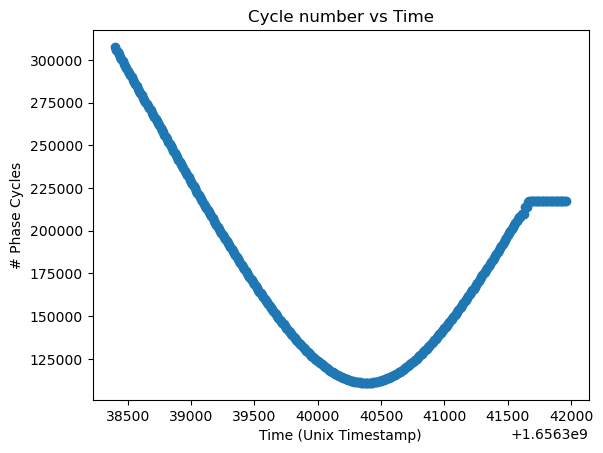

In [56]:
plt.scatter(flight_df['time'], flight_df['cycles']) 
plt.title("Cycle number vs Time")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("# Phase Cycles")

In [57]:
cycles_init=flight_df['cycles'][0] #Find the initial predicted number of cycles
print(cycles_init)
flight_df['phase']=cycles_init-flight_df['cycles'] #Creates a new column representing the phase as I understand it
#I caluculated the phase by subtracting the number of cycles at any time from the initial number of cycles picked up. 
#I think this is roughly what is being described in John Marino's paper

307640.0852497556


In [58]:
flight_df['phase']=cycles_init-flight_df['cycles']

Text(0, 0.5, 'Phase Wraping')

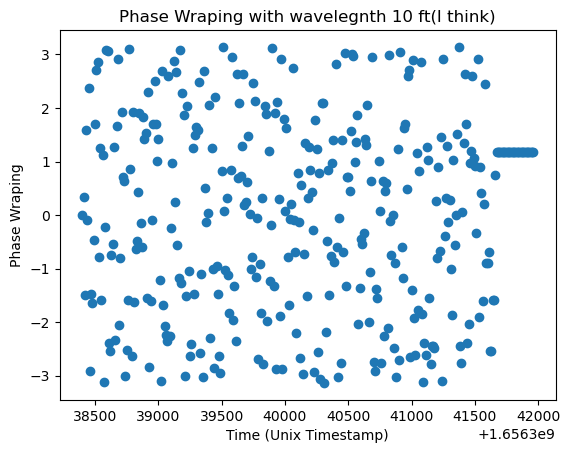

In [59]:
#Do Phase wraping
flight_df['phase_wraping']=jt.interferometry.wrap_phase(2*3.14*flight_df['phase'])
plt.scatter(flight_df['time'], flight_df['phase_wraping']) 
plt.title("Phase Wraping with wavelegnth 10 ft(I think)")
plt.xlabel("Time (Unix Timestamp)")
plt.ylabel("Phase Wraping")
#Note that right now the wavelegnth is way off


In [60]:
#Apparently Pandas has built in interpolation.
flight_df['time_s']=flight_df['time']-min(flight_df['time'])
timePhase_df=flight_df[['time_s','phase']].copy()
print(timePhase_df)

     time_s         phase
0         0      0.000000
1        10   1519.823139
2        20   2835.199879
3        30   4236.400814
4        40   5609.830050
..      ...           ...
352    3520  89986.807476
353    3530  89986.807476
354    3540  89986.807476
355    3550  89986.807476
356    3560  89986.807476

[357 rows x 2 columns]


In [61]:
df_toInterpolate=pd.DataFrame(columns=['time_s','phase'])


N=100
x=0
while x<=len(timePhase_df)-2:

    new_x = np.linspace(timePhase_df['time_s'][x], timePhase_df['time_s'][x+1].max(), num=N)

    # Create a vector with NaNs
    vector = np.full(N, np.nan)  # Create an array filled with NaNs
    vector[0]=timePhase_df['phase'][x]

    df=pd.DataFrame({'time_s':new_x,'phase':vector})
    df_toInterpolate=pd.concat([df_toInterpolate, df], ignore_index=True)
    x+=1

/var/folders/zv/xvrfn2s16sv2y7nyhzw377y40000gn/T/ipykernel_1548/367633790.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_toInterpolate=pd.concat([df_toInterpolate, df], ignore_index=True)


In [62]:
df_toInterpolate

,time_s,phase
0,0.00000,0.0
1,0.10101,NaN
2,0.20202,NaN
3,0.30303,NaN
4,0.40404,NaN
...,...,...
35595,3559.59596,NaN
35596,3559.69697,NaN
35597,3559.79798,NaN
35598,3559.89899,NaN


In [63]:
from scipy.interpolate import BarycentricInterpolator
df_interpolated=BarycentricInterpolator(df_toInterpolate['phase'],df_toInterpolate['time_s'])

In [64]:
#df_interpolated = df_toInterpolate.interpolate(method='linear', axis=0).interpolate(method='linear', axis=1)
df_interpolated=df_toInterpolate.interpolate(method='quadratic')
df_interpolated


,time_s,phase
0,0.00000,0.000000
1,0.10101,16.475109
2,0.20202,32.924422
3,0.30303,49.347939
4,0.40404,65.745661
...,...,...
35595,3559.59596,NaN
35596,3559.69697,NaN
35597,3559.79798,NaN
35598,3559.89899,NaN


Text(0, 0.5, 'Phase (Cycles)')

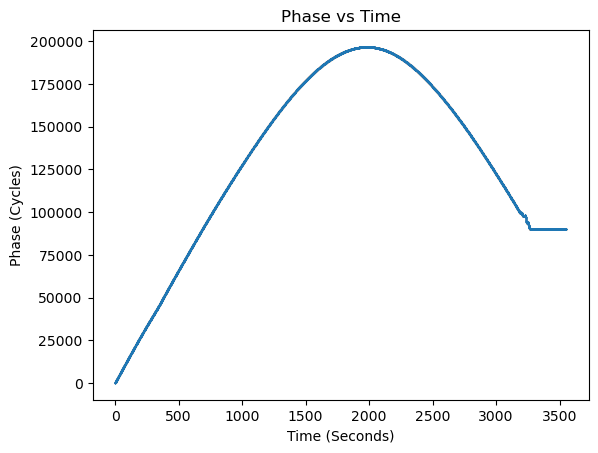

In [65]:
plt.scatter(df_interpolated['time_s'], df_interpolated['phase'],s=.005) 
plt.title("Phase vs Time")
plt.xlabel("Time (Seconds)")
plt.ylabel("Phase (Cycles)")

(1950.0, 2050.0)

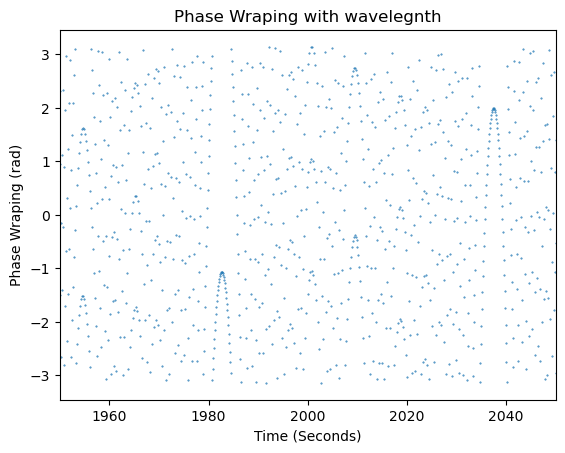

In [66]:
#Do Phase wraping
df_interpolated['phase_wraping']=jt.interferometry.wrap_phase(2*3.14*df_interpolated['phase'])
plt.scatter(df_interpolated['time_s'], df_interpolated['phase_wraping'],s=.2) 
plt.title("Phase Wraping with wavelegnth")
plt.xlabel("Time (Seconds)")
plt.ylabel("Phase Wraping (rad)")
plt.xlim(1950, 2050)

In [67]:
print(max(df_interpolated['time_s']))


3560.0
